<a href="https://colab.research.google.com/github/NeelaRai12/PythonWorldometerProject/blob/master/ProjectWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup
import requests
url = BeautifulSoup('https://www.worldometers.info/coronavirus/', 'html.parser')
url

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning:

"https://www.worldometers.info/coronavirus/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



https://www.worldometers.info/coronavirus/

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Coronavirus Update (Live): 108,313,117 Cases and 2,379,137 Deaths from COVID-19 Virus Pandemic - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon
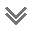

In [ ]:
response = requests.get(url)
data = response.text
data = BeautifulSoup(data,'lxml')
data

In [ ]:

tag = data.table
table_rows = tag.find_all('tr')
table_rows

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td></td>
 <td style="text-align:left;">
 <nobr>North America</nobr>
 </td>
 <td>32,066,067</td>
 <td>+11,564</td>
 <td>704,098<

In [ ]:
headings = []
for th in table_rows[0].find_all("th"):
  print(th.text)
  headings.append(th.text.replace("\n"," ").strip())
print(headings)

#
Country,Other
TotalCases
NewCases
TotalDeaths
NewDeaths
TotalRecovered
NewRecovered
ActiveCases
Serious,Critical
Tot Cases/1M pop
Deaths/1M pop
TotalTests
Tests/
1M pop

Population
Continent
1 Caseevery X ppl
1 Deathevery X ppl
1 Testevery X ppl
['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/ 1M pop', 'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl', '1 Testevery X ppl']


In [ ]:
headings = list(headings)
headings

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/ 1M pop',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl']

In [ ]:
del headings[-4]
del headings[-3]
del headings[-2]
del headings[-1]
del headings[0]

In [ ]:
print(headings)

['Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/ 1M pop', 'Population']


In [ ]:
body = tag.tbody.find_all('tr')
body[0]

<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>North America</nobr>
</td>
<td>32,066,067</td>
<td>+11,564</td>
<td>704,098</td>
<td>+1,514</td>
<td>21,226,611</td>
<td>+9,603</td>
<td>10,135,358</td>
<td>27,190</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="North America" style="display:none;">North America</td>
<td>
</td>
<td></td>
<td></td>
</tr>

In [ ]:
final = []
for i in range(1,len(body)):
  row = []
  for tr in body[i].find_all('td'):
    row.append(tr.text.replace("\n","").strip())

  final.append(row)
final

[['',
  'Asia',
  '23,847,968',
  '+3,811',
  '383,266',
  '+64',
  '22,362,463',
  '+6,309',
  '1,102,239',
  '22,385',
  '',
  '',
  '',
  '',
  '',
  'Asia',
  '',
  '',
  ''],
 ['',
  'South America',
  '16,731,073',
  '+1,352',
  '436,883',
  '+48',
  '15,066,055',
  '+1,619',
  '1,228,135',
  '19,924',
  '',
  '',
  '',
  '',
  '',
  'South America',
  '',
  '',
  ''],
 ['',
  'Europe',
  '31,877,506',
  '+15,838',
  '756,410',
  '+214',
  '18,550,912',
  '+21,214',
  '12,570,184',
  '27,903',
  '',
  '',
  '',
  '',
  '',
  'Europe',
  '',
  '',
  ''],
 ['',
  'Africa',
  '3,739,257',
  '',
  '97,385',
  '',
  '3,268,948',
  '',
  '372,924',
  '2,540',
  '',
  '',
  '',
  '',
  '',
  'Africa',
  '',
  '',
  ''],
 ['',
  'Oceania',
  '50,525',
  '+12',
  '1,080',
  '',
  '34,185',
  '+16',
  '15,260',
  '6',
  '',
  '',
  '',
  '',
  '',
  'Australia/Oceania',
  '',
  '',
  ''],
 ['',
  '',
  '721',
  '',
  '15',
  '',
  '706',
  '',
  '0',
  '0',
  '',
  '',
  '',
  '',
  '',
  

In [ ]:
del final[0:7]
final

[['1',
  'USA',
  '28,002,240',
  '',
  '486,922',
  '',
  '17,930,819',
  '',
  '9,584,499',
  '20,407',
  '84,294',
  '1,466',
  '330,318,833',
  '994,342',
  '332,198,570',
  'North America',
  '12',
  '682',
  '1'],
 ['2',
  'India',
  '10,880,603',
  '+190',
  '155,484',
  '',
  '10,589,230',
  '+1,879',
  '135,889',
  '8,944',
  '7,837',
  '112',
  '204,789,784',
  '147,506',
  '1,388,345,614',
  'Asia',
  '128',
  '8,929',
  '7'],
 ['3',
  'Brazil',
  '9,716,298',
  '',
  '236,397',
  '',
  '8,643,693',
  '',
  '836,208',
  '8,318',
  '45,512',
  '1,107',
  '28,600,000',
  '133,964',
  '213,489,750',
  'South America',
  '22',
  '903',
  '7'],
 ['4',
  'Russia',
  '4,027,748',
  '',
  '78,687',
  '',
  '3,538,422',
  '',
  '410,639',
  '2,300',
  '27,592',
  '539',
  '105,600,000',
  '723,421',
  '145,973,128',
  'Europe',
  '36',
  '1,855',
  '1'],
 ['5',
  'UK',
  '3,998,655',
  '',
  '115,529',
  '',
  '2,056,261',
  '',
  '1,826,865',
  '3,132',
  '58,712',
  '1,696',
  '80,

In [ ]:
finals = list(final)
finals

[['1',
  'USA',
  '28,002,240',
  '',
  '486,922',
  '',
  '17,930,819',
  '',
  '9,584,499',
  '20,407',
  '84,294',
  '1,466',
  '330,318,833',
  '994,342',
  '332,198,570',
  'North America',
  '12',
  '682',
  '1'],
 ['2',
  'India',
  '10,880,603',
  '+190',
  '155,484',
  '',
  '10,589,230',
  '+1,879',
  '135,889',
  '8,944',
  '7,837',
  '112',
  '204,789,784',
  '147,506',
  '1,388,345,614',
  'Asia',
  '128',
  '8,929',
  '7'],
 ['3',
  'Brazil',
  '9,716,298',
  '',
  '236,397',
  '',
  '8,643,693',
  '',
  '836,208',
  '8,318',
  '45,512',
  '1,107',
  '28,600,000',
  '133,964',
  '213,489,750',
  'South America',
  '22',
  '903',
  '7'],
 ['4',
  'Russia',
  '4,027,748',
  '',
  '78,687',
  '',
  '3,538,422',
  '',
  '410,639',
  '2,300',
  '27,592',
  '539',
  '105,600,000',
  '723,421',
  '145,973,128',
  'Europe',
  '36',
  '1,855',
  '1'],
 ['5',
  'UK',
  '3,998,655',
  '',
  '115,529',
  '',
  '2,056,261',
  '',
  '1,826,865',
  '3,132',
  '58,712',
  '1,696',
  '80,

In [ ]:
print(finals)

[['1', 'USA', '28,002,240', '', '486,922', '', '17,930,819', '', '9,584,499', '20,407', '84,294', '1,466', '330,318,833', '994,342', '332,198,570', 'North America', '12', '682', '1'], ['2', 'India', '10,880,603', '+190', '155,484', '', '10,589,230', '+1,879', '135,889', '8,944', '7,837', '112', '204,789,784', '147,506', '1,388,345,614', 'Asia', '128', '8,929', '7'], ['3', 'Brazil', '9,716,298', '', '236,397', '', '8,643,693', '', '836,208', '8,318', '45,512', '1,107', '28,600,000', '133,964', '213,489,750', 'South America', '22', '903', '7'], ['4', 'Russia', '4,027,748', '', '78,687', '', '3,538,422', '', '410,639', '2,300', '27,592', '539', '105,600,000', '723,421', '145,973,128', 'Europe', '36', '1,855', '1'], ['5', 'UK', '3,998,655', '', '115,529', '', '2,056,261', '', '1,826,865', '3,132', '58,712', '1,696', '80,267,452', '1,178,570', '68,105,802', 'Europe', '17', '590', '1'], ['6', 'France', '3,406,685', '', '80,803', '', '238,753', '', '3,087,129', '3,337', '52,120', '1,236', '47

In [ ]:
for i in finals:
  del i[-1]
  del i[-2]
  del i[-3]
  del i[-4]
  del i[0]
print(finals)

[['USA', '28,002,240', '', '486,922', '', '17,930,819', '', '9,584,499', '20,407', '84,294', '1,466', '994,342', 'North America', '682'], ['India', '10,880,603', '+190', '155,484', '', '10,589,230', '+1,879', '135,889', '8,944', '7,837', '112', '147,506', 'Asia', '8,929'], ['Brazil', '9,716,298', '', '236,397', '', '8,643,693', '', '836,208', '8,318', '45,512', '1,107', '133,964', 'South America', '903'], ['Russia', '4,027,748', '', '78,687', '', '3,538,422', '', '410,639', '2,300', '27,592', '539', '723,421', 'Europe', '1,855'], ['UK', '3,998,655', '', '115,529', '', '2,056,261', '', '1,826,865', '3,132', '58,712', '1,696', '1,178,570', 'Europe', '590'], ['France', '3,406,685', '', '80,803', '', '238,753', '', '3,087,129', '3,337', '52,120', '1,236', '726,202', 'Europe', '809'], ['Spain', '3,041,454', '', '64,217', '', 'N/A', 'N/A', 'N/A', '4,432', '65,036', '1,373', '765,139', 'Europe', '728'], ['Italy', '2,683,403', '', '92,729', '', '2,185,655', '', '405,019', '2,126', '44,422', '1

In [ ]:
import pandas as pd
df = pd.DataFrame(finals, columns =headings)
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population
0,USA,"28,002,240",,"486,922",,"17,930,819",,"9,584,499","20,407","84,294","1,466","994,342",North America,682
1,India,"10,880,603",+190,"155,484",,"10,589,230","+1,879","135,889","8,944","7,837",112,"147,506",Asia,"8,929"
2,Brazil,"9,716,298",,"236,397",,"8,643,693",,"836,208","8,318","45,512","1,107","133,964",South America,903
3,Russia,"4,027,748",,"78,687",,"3,538,422",,"410,639","2,300","27,592",539,"723,421",Europe,"1,855"
4,UK,"3,998,655",,"115,529",,"2,056,261",,"1,826,865","3,132","58,712","1,696","1,178,570",Europe,590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Marshall Islands,4,,,,4,,0,,67,,,Australia/Oceania,
217,Samoa,2,,,,2,,0,,10,,,Australia/Oceania,
218,Micronesia,1,,,,1,,0,,9,,,Australia/Oceania,
219,Vanuatu,1,,,,1,,0,,3,,"1,509",Australia/Oceania,


In [ ]:
df.drop(columns=['Tests/ 1M pop'])

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Population
0,USA,"28,002,240",,"486,922",,"17,930,819",,"9,584,499","20,407","84,294","1,466","994,342",682
1,India,"10,880,603",+190,"155,484",,"10,589,230","+1,879","135,889","8,944","7,837",112,"147,506","8,929"
2,Brazil,"9,716,298",,"236,397",,"8,643,693",,"836,208","8,318","45,512","1,107","133,964",903
3,Russia,"4,027,748",,"78,687",,"3,538,422",,"410,639","2,300","27,592",539,"723,421","1,855"
4,UK,"3,998,655",,"115,529",,"2,056,261",,"1,826,865","3,132","58,712","1,696","1,178,570",590
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Marshall Islands,4,,,,4,,0,,67,,,
217,Samoa,2,,,,2,,0,,10,,,
218,Micronesia,1,,,,1,,0,,9,,,
219,Vanuatu,1,,,,1,,0,,3,,"1,509",


In [ ]:
df.to_excel (r'C:\Users\Desktop\export_dataframe.xlsx', index = False, header=True)

In [ ]:
df.to_excel (r'project.xlsx', index = False, header=True)

In [ ]:
df.to_csv('project.csv', sep=',')

In [ ]:
import plotly.express as px
fig = px.bar(df, x='Country,Other', y='TotalDeaths')
fig.show()